# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
import seaborn as sns

In [2]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline # 개체도가져온것
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # ->시각화를 위해서 

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [3]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test))) 
                                            

학습데이터점수:0.2177283706374875
평가데이터점수:0.13544178468518187


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

### SVM을 사용한 분류 모델 (SVC)

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test))) 

학습데이터점수:0.9014084507042254
평가데이터점수:0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

In [5]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("Linear_svr 학습데이터점수:{}".format(linear_svr.score(X_train, y_train)))
print("Linear_svr 평가데이터점수:{}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습데이터점수:{}".format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR :{}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print("RBF SVR 학습데이터점수:{}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가데이터점수:{}".format(rbf_svr.score(X_test, y_test)))





/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

Linear_svr 학습데이터점수:0.7155065522120606
Linear_svr 평가데이터점수:0.638039631835579
Polynomial SVR 학습데이터점수:0.2024454261446288
Polynomial SVR :0.13366845036746255
RBF SVR 학습데이터점수:0.2177283706374875
RBF SVR 평가데이터점수:0.13544178468518187


In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("Linear_SVC 학습데이터점수:{}".format(linear_svc.score(X_train, y_train)))
print("Linear_SVC 평가데이터점수:{}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습데이터점수:{}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC :{}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습데이터점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가데이터점수:{}".format(rbf_svc.score(X_test, y_test)))

Linear_SVC 학습데이터점수:0.960093896713615
Linear_SVC 평가데이터점수:0.986013986013986
Polynomial SVC 학습데이터점수:0.9014084507042254
Polynomial SVC :0.9230769230769231
RBF SVC 학습데이터점수:0.9014084507042254
RBF SVC 평가데이터점수:0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [7]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [8]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree{}, C={}, gamma{}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습데이터점수:{}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC :{}".format(polynomial_svc.score(X_test, y_test)))


kernel=poly, degree2, C=0.1, gammaauto
Polynomial SVC 학습데이터점수:0.9835680751173709
Polynomial SVC :0.993006993006993


In [9]:
rbf_svc = SVC(kernel='rbf', C=2, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel=poly, C={}, gamma{}".format(2, 'auto'))
print("Polynomial SVC 학습데이터점수:{}".format(rbf_svc.score(X_train, y_train)))
print("Polynomial SVC :{}".format(rbf_svc.score(X_test, y_test)))

kernel=poly, C=2, gammaauto
Polynomial SVC 학습데이터점수:0.9154929577464789
Polynomial SVC :0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [10]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [11]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습데이터점수:{}".format(model.score(X_train, y_train)))
print("SVC 평가데이터점수:{}".format(model.score(X_test, y_test)))


SVC 학습데이터점수:0.9014084507042254
SVC 평가데이터점수:0.9230769230769231


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [13]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습데이터점수:{}".format(model.score(X_train, y_train)))
print("SVC 평가데이터점수:{}".format(model.score(X_test, y_test)))

SVC 학습데이터점수:0.9835680751173709
SVC 평가데이터점수:0.986013986013986


In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [15]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습데이터점수:{}".format(model.score(X_train, y_train)))
print("SVC 평가데이터점수:{}".format(model.score(X_test, y_test)))

SVC 학습데이터점수:0.9812206572769953
SVC 평가데이터점수:0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [16]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [18]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [19]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.686438452287425
평가데이터점수:0.7341270204661186


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


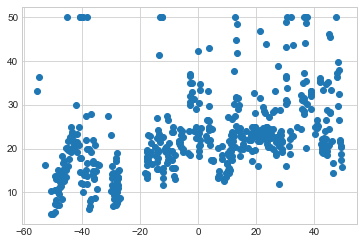

In [20]:
# 저차원 변환 후 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);


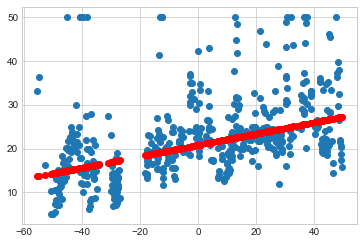

In [21]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [22]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.5s finished


{'fit_time': array([0.00600195, 0.00607204, 0.00579929, 0.00607491, 0.00603509]),
 'score_time': array([0.00067401, 0.00068712, 0.00066471, 0.00060105, 0.0006659 ]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [23]:
# C -> cost 오차허용 정도 

pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='linear'))])
param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [24]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [25]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [27]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [28]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.5065978378262584
평가데이터점수:0.4797605261208019


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


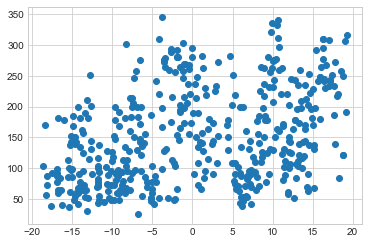

In [29]:
# 저차원 변환 후 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);


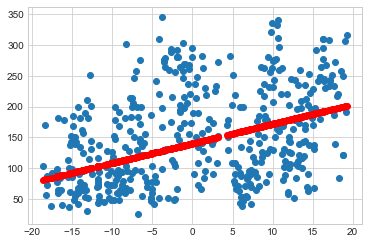

In [30]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [31]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00401998, 0.00287104, 0.00267196, 0.00439978, 0.00321388]),
 'score_time': array([0.00052404, 0.00059605, 0.00056815, 0.00056386, 0.00056005]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [32]:
# C -> cost 오차허용 정도 

pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='linear'))])
param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [33]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [34]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [36]:
model = SVR(kernel='rbf',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*

SVR(verbose=True)


optimization finished, #iter = 310
obj = -1515.404599, rho = -21.918638
nSV = 390, nBSV = 367


In [37]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.716326417197688
평가데이터점수:0.5122503431972789


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


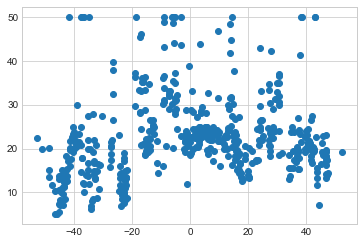

In [38]:
# 저차원 변환 후 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);


[LibSVM]*
optimization finished, #iter = 373
obj = -2936.882512, rho = -18.911593
nSV = 500, nBSV = 495


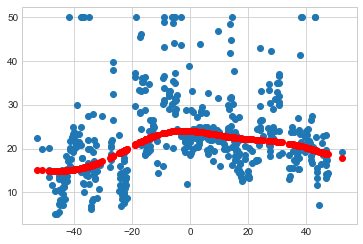

In [39]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [40]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00422215, 0.00430608, 0.00447392, 0.00667715, 0.00771499]),
 'score_time': array([0.00178385, 0.00196195, 0.00188112, 0.00182199, 0.00181818]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [41]:
# C -> cost 오차허용 정도 

pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial','sigmoid']}]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [42]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [43]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01],
              'model__epsilon' : [1.0, 0.1, 0.01]}]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [44]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

### 당뇨병

In [45]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [47]:
model = SVR(kernel='rbf',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 183


SVR(verbose=True)

obj = -21675.349743, rho = -139.032878
nSV = 352, nBSV = 349


In [48]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.17494852030704533
평가데이터점수:0.1258881775303361


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


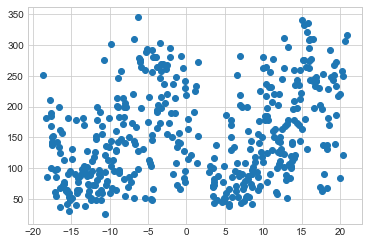

In [49]:
# 저차원 변환 후 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);


[LibSVM]*
optimization finished, #iter = 296
obj = -27674.357736, rho = -145.671643
nSV = 441, nBSV = 439


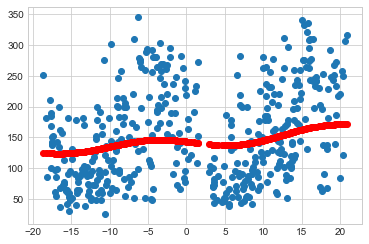

In [50]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [51]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00321484, 0.00298715, 0.00285983, 0.00289893, 0.00297379]),
 'score_time': array([0.00147986, 0.00139785, 0.00142193, 0.00149512, 0.00154901]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [52]:
# C -> cost 오차허용 정도 

pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial','sigmoid']}]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [53]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [54]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01],
              'model__epsilon' : [1.0, 0.1, 0.01]}]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [55]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [56]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [57]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.377559826899744
평가데이터점수:0.34986248092138206


## Linear SVC

### 유방암

In [58]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [60]:
model = SVC(kernel='linear',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*

SVC(kernel='linear', verbose=True)

.*
optimization finished, #iter = 891
obj = -22.854508, rho = -0.148821
nSV = 36, nBSV = 19
Total nSV = 36


In [61]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.9824175824175824
평가데이터점수:0.9649122807017544


In [62]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [63]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


In [64]:
# 저차원 변환 후 시각화
# components 2로바꿔야함
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)



/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[LibSVM].................
*.*.
*..*
optimization finished, #iter = 11786
obj = -131.510531, rho = 0.447517
nSV = 133, nBSV = 130
Total nSV = 133


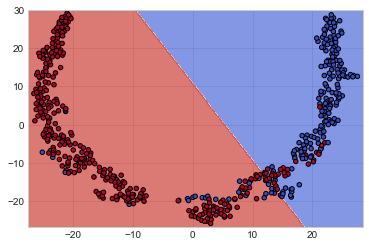

In [65]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [66]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00246191, 0.00187898, 0.00271988, 0.00474405, 0.00503826]),
 'score_time': array([0.00030398, 0.00035524, 0.00041699, 0.00087214, 0.00094795]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [67]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01]
              }]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [68]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [69]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [70]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.9824175824175824
평가데이터점수:0.9736842105263158


### 붓꽃

In [71]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [73]:
model = SVC(kernel='linear',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 15
obj = -1.021820, rho = 1.429909
nSV = 4, nBSV = 0


SVC(kernel='linear', verbose=True)

*
optimization finished, #iter = 15
obj = -0.337741, rho = 0.272930
nSV = 3, nBSV = 0
*
optimization finished, #iter = 36
obj = -14.916006, rho = -2.512487
nSV = 21, nBSV = 18
Total nSV = 25


In [74]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.975
평가데이터점수:0.9666666666666667


In [75]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [76]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


In [77]:
# 저차원 변환 후 시각화
# components 2로바꿔야함
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)



/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 3
obj = -0.002389, rho = 0.445512
nSV = 2, nBSV = 0
*
optimization finished, #iter = 3
obj = -0.002633, rho = 0.513476
nSV = 2, nBSV = 0
.*
optimization finished, #iter = 121
obj = -13.882047, rho = 5.372382
nSV = 16, nBSV = 13
Total nSV = 18


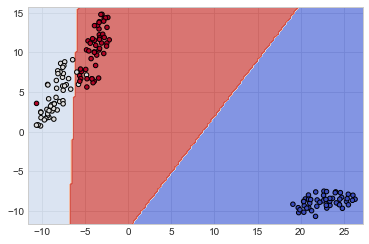

In [78]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [79]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0007031 , 0.00051379, 0.00045013, 0.00067997, 0.00042295]),
 'score_time': array([0.0001688 , 0.00014782, 0.00013709, 0.00017309, 0.00013781]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [80]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01]
              }]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [81]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [82]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [83]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.975
평가데이터점수:0.9666666666666667


### 와인

In [84]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [86]:
model = SVC(kernel='linear',verbose=True)
model.fit(X_train, y_train)

[LibSVM]..*...*
optimization finished, #iter = 579
obj = -1.727261, rho = 0.086976
nSV = 12, nBSV = 0
*
optimization finished, #iter = 31
obj = -0.243585, rho = -0.357994
nSV = 6, nBSV = 0
*.*
optimization finished, #iter = 108
obj = -2.446370, rho = -1.982617
nSV = 10, nBSV = 0
Total nSV = 23


SVC(kernel='linear', verbose=True)

In [87]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:1.0
평가데이터점수:1.0


In [88]:
# 저차원 변환 후 시각화
# components 2로바꿔야함
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)



/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[LibSVM].
*
optimization finished, #iter = 188
obj = -19.766630, rho = -0.401173
nSV = 22, nBSV = 19
*
optimization finished, #iter = 97
obj = -20.132972, rho = 2.379117
nSV = 22, nBSV = 20
............
*............................*............*.............................................*
optimization finished, #iter = 11451
obj = -78.305133, rho = 2.398302
nSV = 80, nBSV = 77
Total nSV = 98


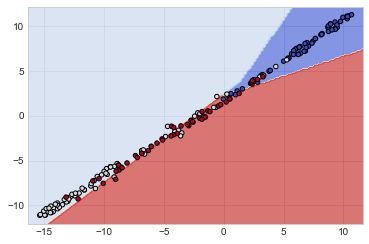

In [89]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [90]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00076985, 0.00096607, 0.00189281, 0.00086594, 0.00115609]),
 'score_time': array([0.00018597, 0.00019693, 0.00060415, 0.0001862 , 0.00019002]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [91]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01]
              }]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [92]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [93]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [94]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.9929577464788732
평가데이터점수:1.0


## Kernel SVC

### 유방암

In [95]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [97]:
model = SVC(kernel='rbf',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*

SVC(verbose=True)


optimization finished, #iter = 168
obj = -51.718278, rho = -0.230966
nSV = 105, nBSV = 54
Total nSV = 105


In [98]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.989010989010989
평가데이터점수:0.9824561403508771


In [99]:
# 저차원 변환 후 시각화
# components 2로바꿔야함
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)



/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 177
obj = -114.732030, rho = 0.233532
nSV = 128, nBSV = 120
Total nSV = 128


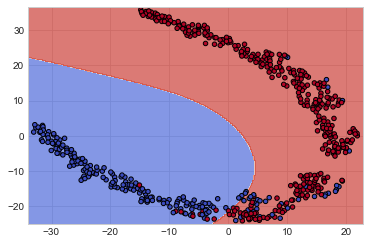

In [100]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [101]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00198102, 0.00203705, 0.00299406, 0.00260901, 0.00397682]),
 'score_time': array([0.00074792, 0.00085664, 0.00093412, 0.00085092, 0.00087905]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [102]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01]
              }]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [103]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [104]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [105]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.989010989010989
평가데이터점수:0.9824561403508771


### 붓꽃

In [106]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [108]:
model = SVC(kernel='rbf',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 33


SVC(verbose=True)

obj = -2.634736, rho = 0.096805
nSV = 12, nBSV = 2
*
optimization finished, #iter = 30
obj = -2.510713, rho = 0.250971
nSV = 11, nBSV = 1
*
optimization finished, #iter = 51
obj = -22.071863, rho = 0.009390
nSV = 36, nBSV = 27
Total nSV = 47


In [109]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.9666666666666667
평가데이터점수:0.9666666666666667


In [110]:
# 저차원 변환 후 시각화
# components 2로바꿔야함
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)



/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 9
obj = -1.140538, rho = 0.020192
nSV = 4, nBSV = 0
*
optimization finished, #iter = 11
obj = -1.191627, rho = 0.087564
nSV = 4, nBSV = 0
*
optimization finished, #iter = 26
obj = -33.784147, rho = 0.070731
nSV = 44, nBSV = 42
Total nSV = 48


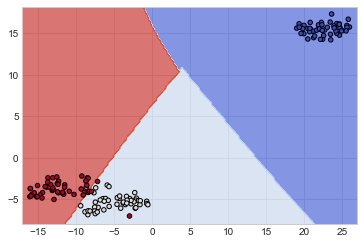

In [111]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [112]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00075293, 0.000525  , 0.000494  , 0.00047493, 0.00048876]),
 'score_time': array([0.00021982, 0.00019002, 0.00018167, 0.00018811, 0.00018811]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [113]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01]
              }]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [114]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [115]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [116]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:0.9666666666666667
평가데이터점수:0.9666666666666667


### 와인

In [117]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [119]:
model = SVC(kernel='rbf',verbose=True)
model.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 76
obj = -10.548819, rho = 0.641008


SVC(verbose=True)

nSV = 38, nBSV = 7
*
optimization finished, #iter = 57
obj = -4.539289, rho = 0.089261
nSV = 22, nBSV = 0
*
optimization finished, #iter = 57
obj = -10.431462, rho = -0.438800
nSV = 33, nBSV = 9
Total nSV = 60


In [120]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:1.0
평가데이터점수:0.9722222222222222


In [121]:
# 저차원 변환 후 시각화
# components 2로바꿔야함
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)



/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 24
obj = -22.232918, rho = 0.275138
nSV = 26, nBSV = 23
*
optimization finished, #iter = 26
obj = -23.977401, rho = 0.262204
nSV = 28, nBSV = 25
*
optimization finished, #iter = 70
obj = -80.436122, rho = -0.148875
nSV = 84, nBSV = 80
Total nSV = 101


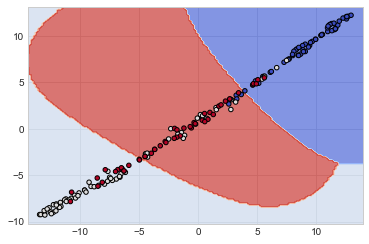

In [122]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [123]:
# pipeline 으로 CV 만들기
# verbose -> log 출력 여부 
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(
    estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(),
    verbose=True)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00086284, 0.00095725, 0.00087929, 0.00076604, 0.00092983]),
 'score_time': array([0.00025606, 0.00028086, 0.00027084, 0.00026417, 0.00027013]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [124]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, 0.1, 0.01]
              }]
               
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [125]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [126]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [127]:
print("학습데이터점수:{}".format(model.score(X_train, y_train)))
print("평가데이터점수:{}".format(model.score(X_test, y_test)))

학습데이터점수:1.0
평가데이터점수:0.9722222222222222
